In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from scipy.stats import skew

In [ ]:
# Load Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
# Data Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [ ]:
print(df.isna().any().sum())  # This should print the total count of columns with missing values


0


In [ ]:
# Handling Missing Values
print("Before Handling Missing Values:")
print(df.isnull().sum())
df_before_missing = df.copy()
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)
print("After Handling Missing Values:")
print(df.isnull().sum())
print("Missing values handled.")

Before Handling Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64
After Handling Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64
Missing values handled.


In [ ]:
# Display before and after summary
print("Summary Before Handling Missing Values:")
print(df_before_missing.describe())
print("Summary After Handling Missing Values:")
print(df.describe())


Summary Before Handling Missing Values:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.1

In [ ]:
# Handling Outliers using IQR Method
print("Before Removing Outliers:")
print(df.describe())
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After Removing Outliers:")
print(df.describe())
print("Outliers removed using IQR method.")

Before Removing Outliers:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min   

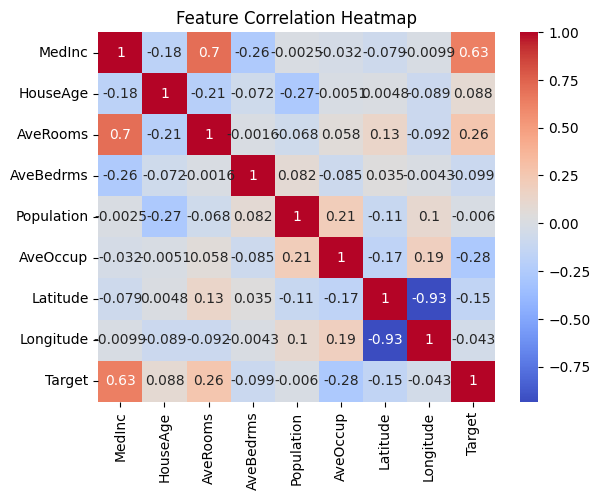

Correlation analysis completed.


In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
print("Correlation analysis completed.")

In [ ]:
# Feature Selection: Removing highly correlated features
print("Before Removing Highly Correlated Features:")
print(df.columns)
threshold = 0.9
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_features.add(corr_matrix.columns[i])
df = df.drop(columns=correlated_features)
print("After Removing Highly Correlated Features:")
print(df.columns)
print("Highly correlated features removed.")


Before Removing Highly Correlated Features:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')
After Removing Highly Correlated Features:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Target'],
      dtype='object')
Highly correlated features removed.


In [ ]:
print("Before Skewness Handling:")
skewed_features = df.drop(columns=['Target']).apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)
for feature in skewed_features.index:
    if abs(skewed_features[feature]) > 0.75:
        df[feature] = np.log1p(df[feature])
print("After Skewness Handling:")
skewed_features = df.drop(columns=['Target']).apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

Before Skewness Handling:
Population    0.718553
MedInc        0.536713
Latitude      0.410809
AveOccup      0.337158
AveBedrms     0.242224
AveRooms      0.106760
HouseAge      0.015885
dtype: float64
After Skewness Handling:
Population    0.718553
MedInc        0.536713
Latitude      0.410809
AveOccup      0.337158
AveBedrms     0.242224
AveRooms      0.106760
HouseAge      0.015885
dtype: float64


In [ ]:
print("Features considered for log transformation:")
print(skewed_features[skewed_features.abs() > 0.75])


Features considered for log transformation:
Series([], dtype: float64)


In [ ]:
# Train-Test Split
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split completed.")

Train-test split completed.


In [ ]:
# Data Scaling
print("Before Scaling:")
print(pd.DataFrame(X_train).describe())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("After Scaling:")
print(pd.DataFrame(X_train_scaled).describe())

print("Data scaling completed.")


Before Scaling:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  13049.000000  13049.000000  13049.000000  13049.000000  13049.000000   
mean       3.675303     29.406315      5.164270      1.047152   1269.771707   
std        1.447211     12.205864      1.042776      0.066661    626.066715   
min        0.536000      1.000000      2.032738      0.866013      5.000000   
25%        2.579500     19.000000      4.433962      1.002732    815.000000   
50%        3.516100     30.000000      5.147059      1.043807   1158.000000   
75%        4.602800     38.000000      5.854497      1.088466   1629.000000   
max        8.008200     52.000000      8.452915      1.239521   3132.000000   

           AveOccup      Latitude  
count  13049.000000  13049.000000  
mean       2.863140     35.681543  
std        0.622944      2.139613  
min        1.161290     32.560000  
25%        2.440108     33.940000  
50%        2.811881     34.340000  
75%        3.243346 

In [ ]:
# Feature Engineering: Adding Polynomial Features
print("Before Polynomial Feature Addition:")
print(X_train.shape)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("After Polynomial Feature Addition:")
print(X_train_poly.shape)
print("Polynomial features added.")

Before Polynomial Feature Addition:
(13049, 7)
After Polynomial Feature Addition:
(13049, 35)
Polynomial features added.


In [ ]:
# Model Training & Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    elapsed_time = end_time - start_time

    return mae, rmse, r2, elapsed_time, y_pred

In [ ]:

model = LinearRegression()

# Train and evaluate the model
mae, rmse, r2, elapsed_time, y_pred = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
cross_val = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2').mean()

# Store results
results = {
    'MAE': round(mae, 6),
    'RMSE': round(float(rmse), 6),
    'R² Score': round(r2, 6),
    'Cross-Val R²': round(float(cross_val), 6),
    'Time (s)': round(elapsed_time, 6)
}
predictions = y_pred

# Print or log results
print(f"Multiple Linear Regression")
print(results)


Multiple Linear Regression
{'MAE': 0.455464, 'RMSE': 0.603963, 'R² Score': 0.582699, 'Cross-Val R²': 0.572286, 'Time (s)': 0.009666}


In [ ]:
print(X_train_scaled.shape)


(13049, 7)


In [ ]:
models = {
    'Simple Linear Regression': LinearRegression(),
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Polynomial Regression': LinearRegression(),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
}

In [ ]:
results = {}
predictions = {}
cross_val_results = {}

X_train_simple = X_train_scaled[:, 0].reshape(-1, 1)  # Select only the first feature
X_test_simple = X_test_scaled[:, 0].reshape(-1, 1)

for name, model in models.items():
    if name == 'Polynomial Regression':
        mae, rmse, r2, elapsed_time, y_pred = evaluate_model(model, X_train_poly, X_test_poly, y_train, y_test)
        cross_val = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2').mean()
    elif name == 'Simple Linear Regression':
        mae, rmse, r2, elapsed_time, y_pred = evaluate_model(model, X_train_simple, X_test_simple, y_train, y_test)
        cross_val = cross_val_score(model, X_train_simple, y_train, cv=5, scoring='r2').mean()
    else:
        mae, rmse, r2, elapsed_time, y_pred = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
        cross_val = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2').mean()

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R² Score': r2,
        'Cross-Val R²': cross_val,
        'Time (s)': elapsed_time
    }
    predictions[name] = y_pred


In [ ]:
# Convert results to DataFrame & Display
results_df = pd.DataFrame(results).T
print(results_df)



                                 MAE      RMSE  R² Score  Cross-Val R²  \
Simple Linear Regression    0.547731  0.710277  0.422856      0.395033   
Multiple Linear Regression  0.455464  0.603963  0.582699      0.572286   
Ridge Regression            0.455466  0.603960  0.582704      0.572287   
Lasso Regression            0.518089  0.666121  0.492384      0.473800   
Polynomial Regression       0.428649  0.574854  0.621955      0.614197   
SVR                         0.387988  0.535469  0.671982      0.653634   
Decision Tree               0.521227  0.743193  0.368124      0.332474   
Random Forest               0.370931  0.515384  0.696128      0.674627   

                             Time (s)  
Simple Linear Regression     0.003599  
Multiple Linear Regression   0.002987  
Ridge Regression             0.002554  
Lasso Regression             0.002538  
Polynomial Regression        0.019511  
SVR                         10.112624  
Decision Tree                0.174299  
Random Forest

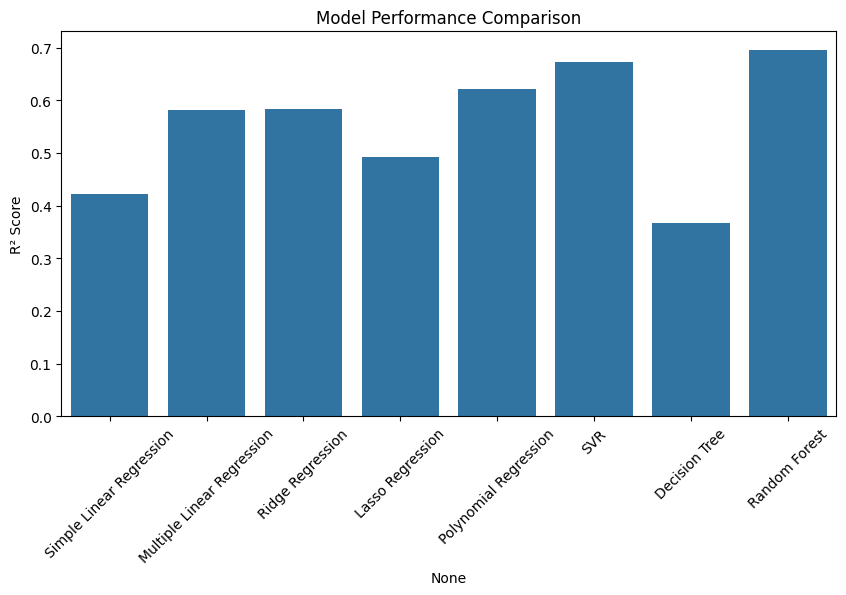

Visualization completed.


In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x=results_df.index, y='R² Score')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()
print("Visualization completed.")


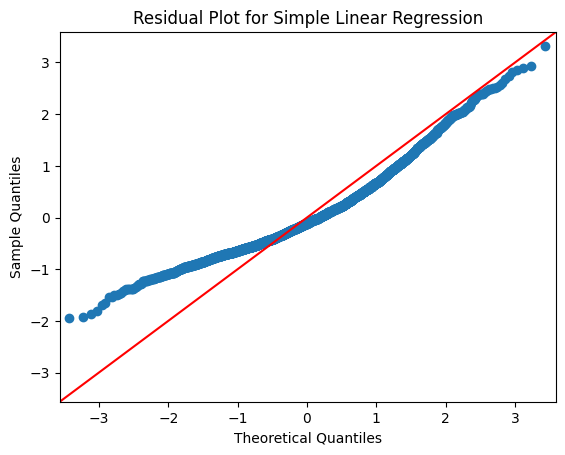

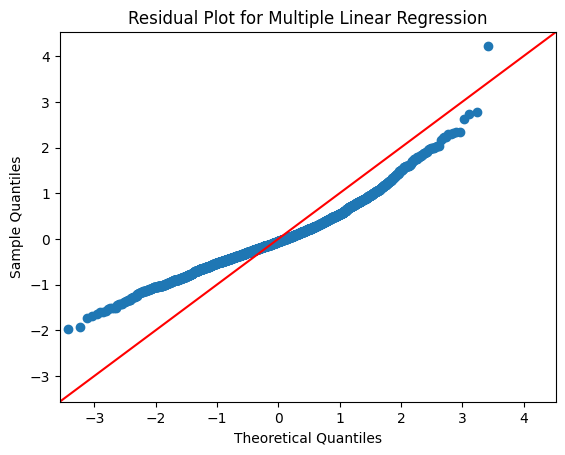

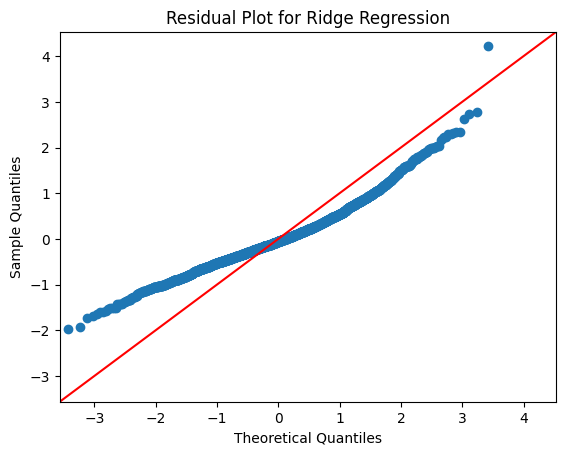

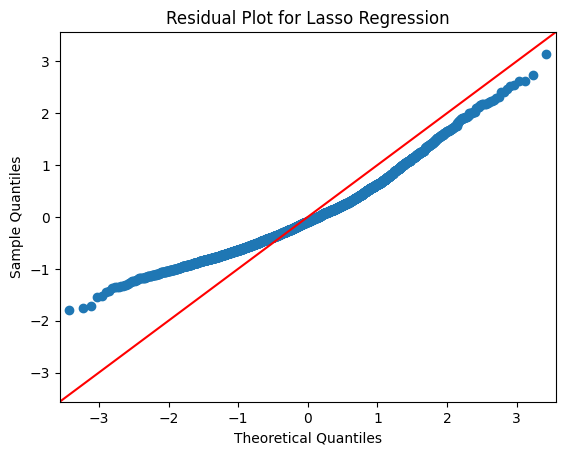

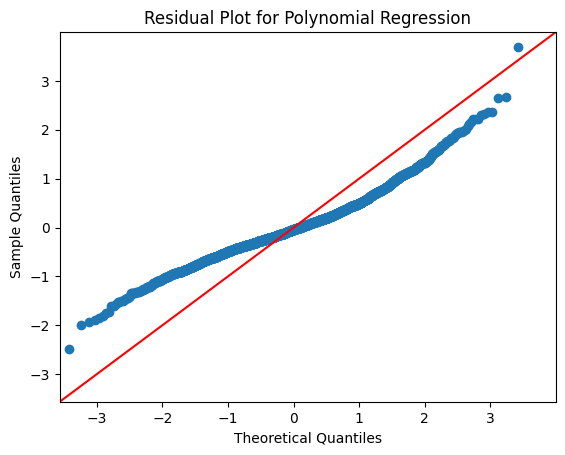

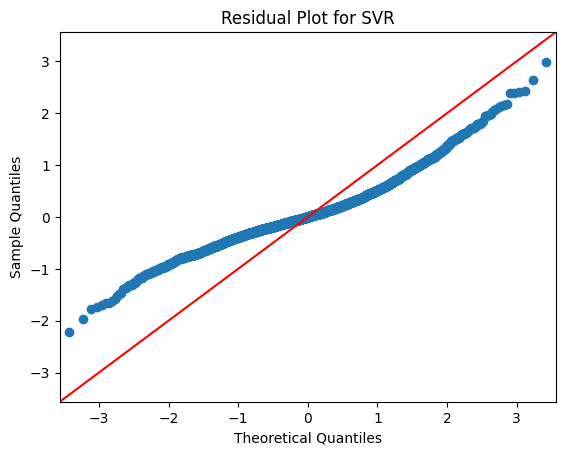

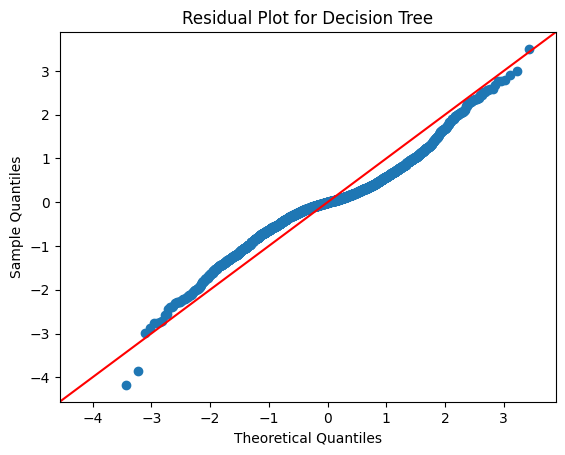

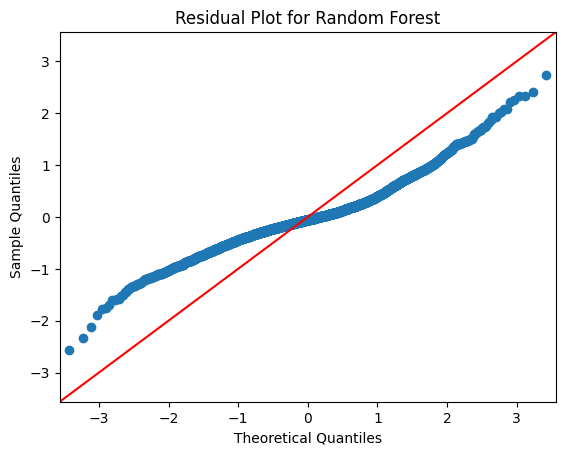

In [ ]:
import statsmodels.api as sm

for name, y_pred in predictions.items():
    residuals = y_test - y_pred
    sm.qqplot(residuals, line='45')
    plt.title(f"Residual Plot for {name}")
    plt.show()

In [ ]:
# Conclusion
best_model = results_df['R² Score'].idxmax()
print(f"The best performing model is: {best_model} with an R² Score of {results_df.loc[best_model, 'R² Score']:.4f}")


The best performing model is: Random Forest with an R² Score of 0.6961


In [196]:
!git push origin main


Everything up-to-date


In [197]:
!cp /content/drive/MyDrive/Colab_Notebooks/Machine_Learning_Task_2.ipynb /content/


In [198]:
!ls -lh /content/


total 536K
drwx------ 6 root root 4.0K Mar 23 12:24 drive
-rw------- 1 root root 522K Mar 23 12:30 Machine_Learning_Task_2.ipynb
-rw-r--r-- 1 root root  200 Mar 23 12:04 README.md
drwxr-xr-x 1 root root 4.0K Mar 20 13:31 sample_data


In [199]:
!git add Machine_Learning_Task_2.ipynb
!git commit -m "Added Machine Learning Task 2 notebook"
!git push origin main


[main d6a8e7a] Added Machine Learning Task 2 notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Machine_Learning_Task_2.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 367.75 KiB | 5.33 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/MohammedRafiqueKuwari/machine_Learning_Tasks.git
   eeb898c..d6a8e7a  main -> main


In [200]:
import json

file_path = "/content/Machine_Learning_Task_2.ipynb"  # Adjust path if needed

try:
    with open(file_path, "r", encoding="utf-8") as f:
        json.load(f)
    print("✅ Notebook JSON is valid!")
except json.JSONDecodeError as e:
    print(f"❌ Notebook JSON is invalid: {e}")


✅ Notebook JSON is valid!
